<a href="https://colab.research.google.com/github/MuneefMumthas/CO653-TEAM-EM/blob/main/CO653-TEAM-EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CO653 - Learning Machines and Intelligent Agents

Team mates:

Muneef - 22206529

Entwan - 22135347


In [531]:
#Importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.utils import resample
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [532]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [533]:
train = pd.read_csv('/content/drive/MyDrive/Loan_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Loan_test.csv')

train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [534]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [535]:
train.shape

(614, 13)

In [536]:
test.shape

(367, 12)

In [537]:
train.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [538]:
test.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,int64
LoanAmount,float64
Loan_Amount_Term,float64


###Checking the missing values

In [539]:
# Calculate the percentage of missing values per column
missing_percentage = train.isnull().mean() * 100

# Display columns with more than 0% missing values
print(missing_percentage[missing_percentage > 0])

Gender              2.117264
Married             0.488599
Dependents          2.442997
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
dtype: float64


In [540]:
# Calculate the percentage of missing values per column
missing_percentage = test.isnull().mean() * 100

# Display columns with more than 0% missing values
print(missing_percentage[missing_percentage > 0])

Gender              2.997275
Dependents          2.724796
Self_Employed       6.267030
LoanAmount          1.362398
Loan_Amount_Term    1.634877
Credit_History      7.901907
dtype: float64


In [541]:
missing = train[train.isnull().any(axis=1)]
missing

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [542]:
def handle_missing_values(data, threshold=0.5):
    """
    Handles missing values in a dataset:
    - Drops columns with more than a specified threshold of missing values.
    - Fills remaining missing values with median for numeric columns and mode for categorical columns.

    Parameters:
        data (pd.DataFrame): The input dataset.
        threshold (float): The proportion of missing values above which columns are dropped (default 0.5).

    Returns:
        pd.DataFrame: The cleaned dataset.
    """
    # Step 2: Fill numeric columns with median
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        if data[col].isnull().sum() > 0:  # Only fill if there are missing values
            data[col] = data[col].fillna(data[col].median())

    # Step 3: Fill categorical columns with mode
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns
    for col in categorical_columns:
        if data[col].isnull().sum() > 0:  # Only fill if there are missing values
            data[col] = data[col].fillna(data[col].mode()[0])  # Use the most frequent value

    return data

# Example usage
train = handle_missing_values(train, threshold=0.5)

# Check the result
print(train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [543]:
# Example usage
test = handle_missing_values(test, threshold=0.5)

# Check the result
print(train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [544]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [545]:
train = train.drop("Loan_ID", axis = 1)

In [546]:
test = test.drop("Loan_ID", axis = 1)

In [547]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [548]:
train['Loan_Income_Ratio'] = train['LoanAmount'] / (train['TotalIncome'] + 1)
test['Loan_Income_Ratio'] = test['LoanAmount'] / (test['TotalIncome'] + 1)

In [549]:
train['Credit_History'] = train['Credit_History'].fillna(0)
test['Credit_History'] = test['Credit_History'].fillna(0)

In [550]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Income_Ratio
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,0.021880
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.021011
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.021993
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.024282
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.023496


In [551]:
a = train['Property_Area'].unique()
print(sorted(a))

['Rural', 'Semiurban', 'Urban']


In [552]:
unique = train_encoded['Dependents'].unique()
print(sorted(unique))

['0', '1', '2', '3+']


In [553]:
unique = train_encoded['Education'].unique()
print(sorted(unique))

[np.float64(0.6146509502495723), np.float64(0.7081164579065785)]


In [554]:
!pip install category_encoders

In [555]:
import category_encoders as ce

encoder_mestimate = ce.MEstimateEncoder(cols=['Gender', 'Married', 'Property_Area', 'Education', 'Self_Employed'], m=5)

# Encode features only
train_features_encoded = encoder_mestimate.fit_transform(train.drop(columns=['Loan_Status']), train['Loan_Status'])

# Add target column back
train_encoded = train_features_encoded.copy()
train_encoded['Loan_Status'] = train['Loan_Status'].values
# Transform test features (without target variable)

test_encoded = encoder_mestimate.transform(test)

In [556]:
train_encoded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Income_Ratio,Loan_Status
0,0.691196,0.630443,0,0.708116,0.687964,5849,0.0,128.0,360.0,1.0,0.659113,5849.0,0.021880,Y
1,0.691196,0.717824,1,0.708116,0.687964,4583,1508.0,128.0,360.0,1.0,0.616503,6091.0,0.021011,N
2,0.691196,0.717824,0,0.708116,0.683178,3000,0.0,66.0,360.0,1.0,0.659113,3000.0,0.021993,Y
3,0.691196,0.717824,0,0.614651,0.687964,2583,2358.0,120.0,360.0,1.0,0.659113,4941.0,0.024282,Y
4,0.691196,0.630443,0,0.708116,0.687964,6000,0.0,141.0,360.0,1.0,0.659113,6000.0,0.023496,Y


In [557]:
from sklearn.preprocessing import MinMaxScaler
# Define the columns to scale
columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome', 'Loan_Amount_Term']
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
train_encoded[columns_to_scale] = scaler.fit_transform(train_encoded[columns_to_scale])
test_encoded[columns_to_scale] = scaler.transform(test_encoded[columns_to_scale])  # Use the same scaler for test data


In [558]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder_onehot = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the 'Dependents' column
dependents_encoded = encoder_onehot.fit_transform(train_encoded[['Dependents']])

# Convert to DataFrame with meaningful column names
dependents_df = pd.DataFrame(dependents_encoded, columns=encoder_onehot.get_feature_names_out(['Dependents']))

# Concatenate the encoded columns back to the original dataset
train = pd.concat([train_encoded.drop(columns=['Dependents']), dependents_df], axis=1)

# Apply the same transformation to test data
dependents_encoded_test = encoder_onehot.transform(test_encoded[['Dependents']])
dependents_df_test = pd.DataFrame(dependents_encoded_test, columns=encoder_onehot.get_feature_names_out(['Dependents']))
test = pd.concat([test_encoded.drop(columns=['Dependents']), dependents_df_test], axis=1)

In [559]:
from sklearn.preprocessing import LabelEncoder

# Initialise the encoder
label_encoder = LabelEncoder()

# Fit and transform Loan_Status
train['Loan_Status'] = label_encoder.fit_transform(train['Loan_Status'])


In [560]:
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Income_Ratio,Loan_Status,Dependents_1,Dependents_2,Dependents_3+
0,0.691196,0.630443,0.708116,0.687964,0.070489,0.000000,0.172214,0.74359,1.0,0.659113,0.055394,0.021880,1,0.0,0.0,0.0
1,0.691196,0.717824,0.708116,0.687964,0.054830,0.036192,0.172214,0.74359,1.0,0.616503,0.058435,0.021011,0,1.0,0.0,0.0
2,0.691196,0.717824,0.708116,0.683178,0.035250,0.000000,0.082489,0.74359,1.0,0.659113,0.019583,0.021993,1,0.0,0.0,0.0
3,0.691196,0.717824,0.614651,0.687964,0.030093,0.056592,0.160637,0.74359,1.0,0.659113,0.043980,0.024282,1,0.0,0.0,0.0
4,0.691196,0.630443,0.708116,0.687964,0.072356,0.000000,0.191027,0.74359,1.0,0.659113,0.057292,0.023496,1,0.0,0.0,0.0


In [561]:
test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Income_Ratio,Dependents_1,Dependents_2,Dependents_3+
0,0.691196,0.717824,0.708116,0.687964,0.068893,0.000000,0.146165,0.74359,1.0,0.659113,0.053772,0.019227,0.0,0.0,0.0
1,0.691196,0.717824,0.708116,0.687964,0.036190,0.036000,0.169320,0.74359,1.0,0.659113,0.039393,0.027529,1.0,0.0,0.0
2,0.691196,0.717824,0.708116,0.687964,0.059988,0.043200,0.287988,0.74359,1.0,0.659113,0.067347,0.030584,0.0,1.0,0.0
3,0.691196,0.717824,0.708116,0.687964,0.027087,0.061104,0.131693,0.74359,1.0,0.659113,0.043289,0.020462,0.0,1.0,0.0
4,0.691196,0.630443,0.614651,0.687964,0.038664,0.000000,0.099855,0.74359,1.0,0.659113,0.023052,0.023802,0.0,0.0,0.0


<Axes: ylabel='CoapplicantIncome'>

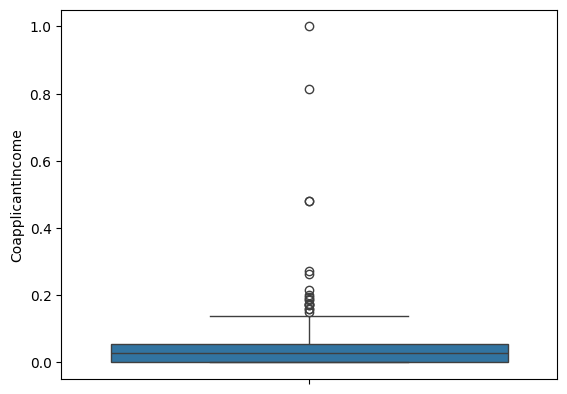

In [562]:
'ApplicantIncome	CoapplicantIncome	LoanAmount'

sns.boxplot(train["CoapplicantIncome"])

<Axes: ylabel='LoanAmount'>

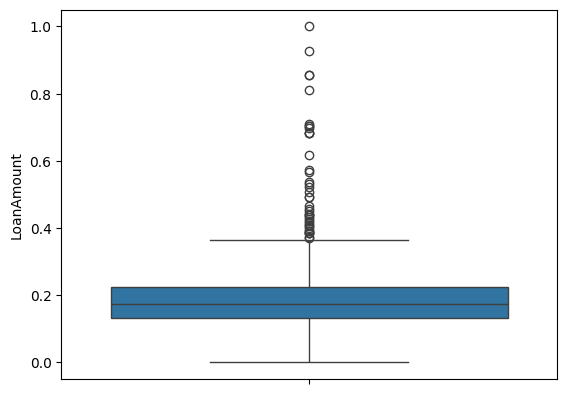

In [563]:
'ApplicantIncome	CoapplicantIncome	LoanAmount'

sns.boxplot(train["LoanAmount"])

<Axes: ylabel='ApplicantIncome'>

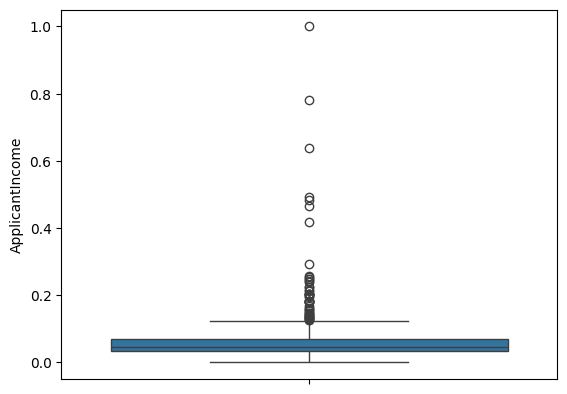

In [564]:
'ApplicantIncome	CoapplicantIncome	LoanAmount'

sns.boxplot(train["ApplicantIncome"])

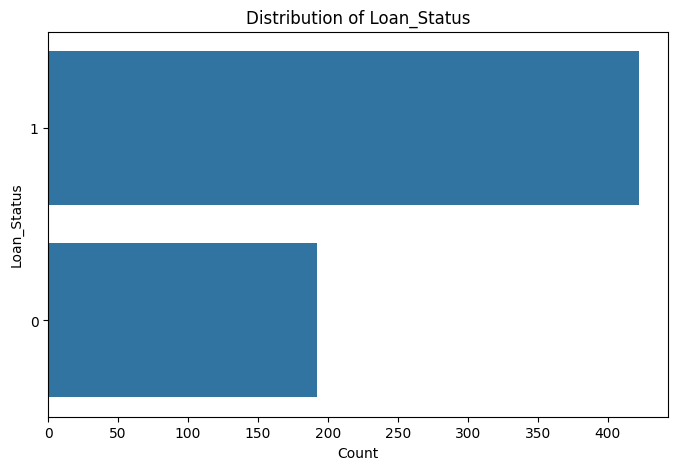

In [565]:
# Plot categorical feature distributions

plt.figure(figsize=(8, 5))
sns.countplot(y=train["Loan_Status"], order=train["Loan_Status"].value_counts().index)
plt.title(f"Distribution of Loan_Status")
plt.xlabel("Count")
plt.ylabel("Loan_Status")
plt.show()

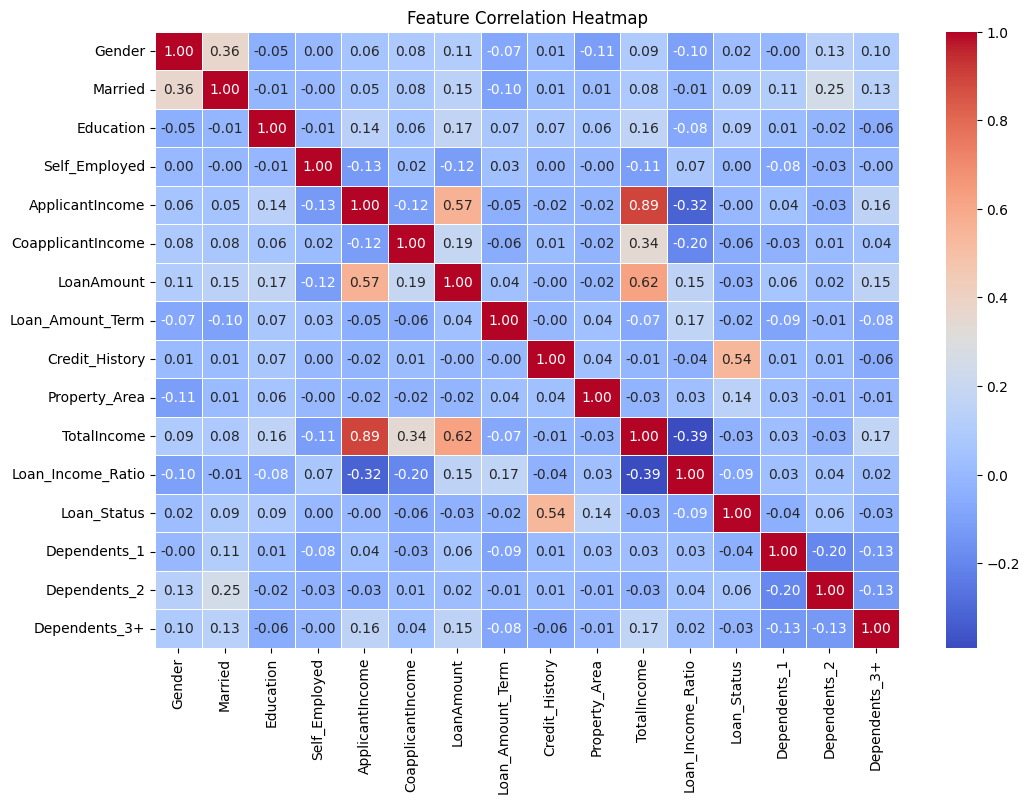

In [566]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


####Pairplot

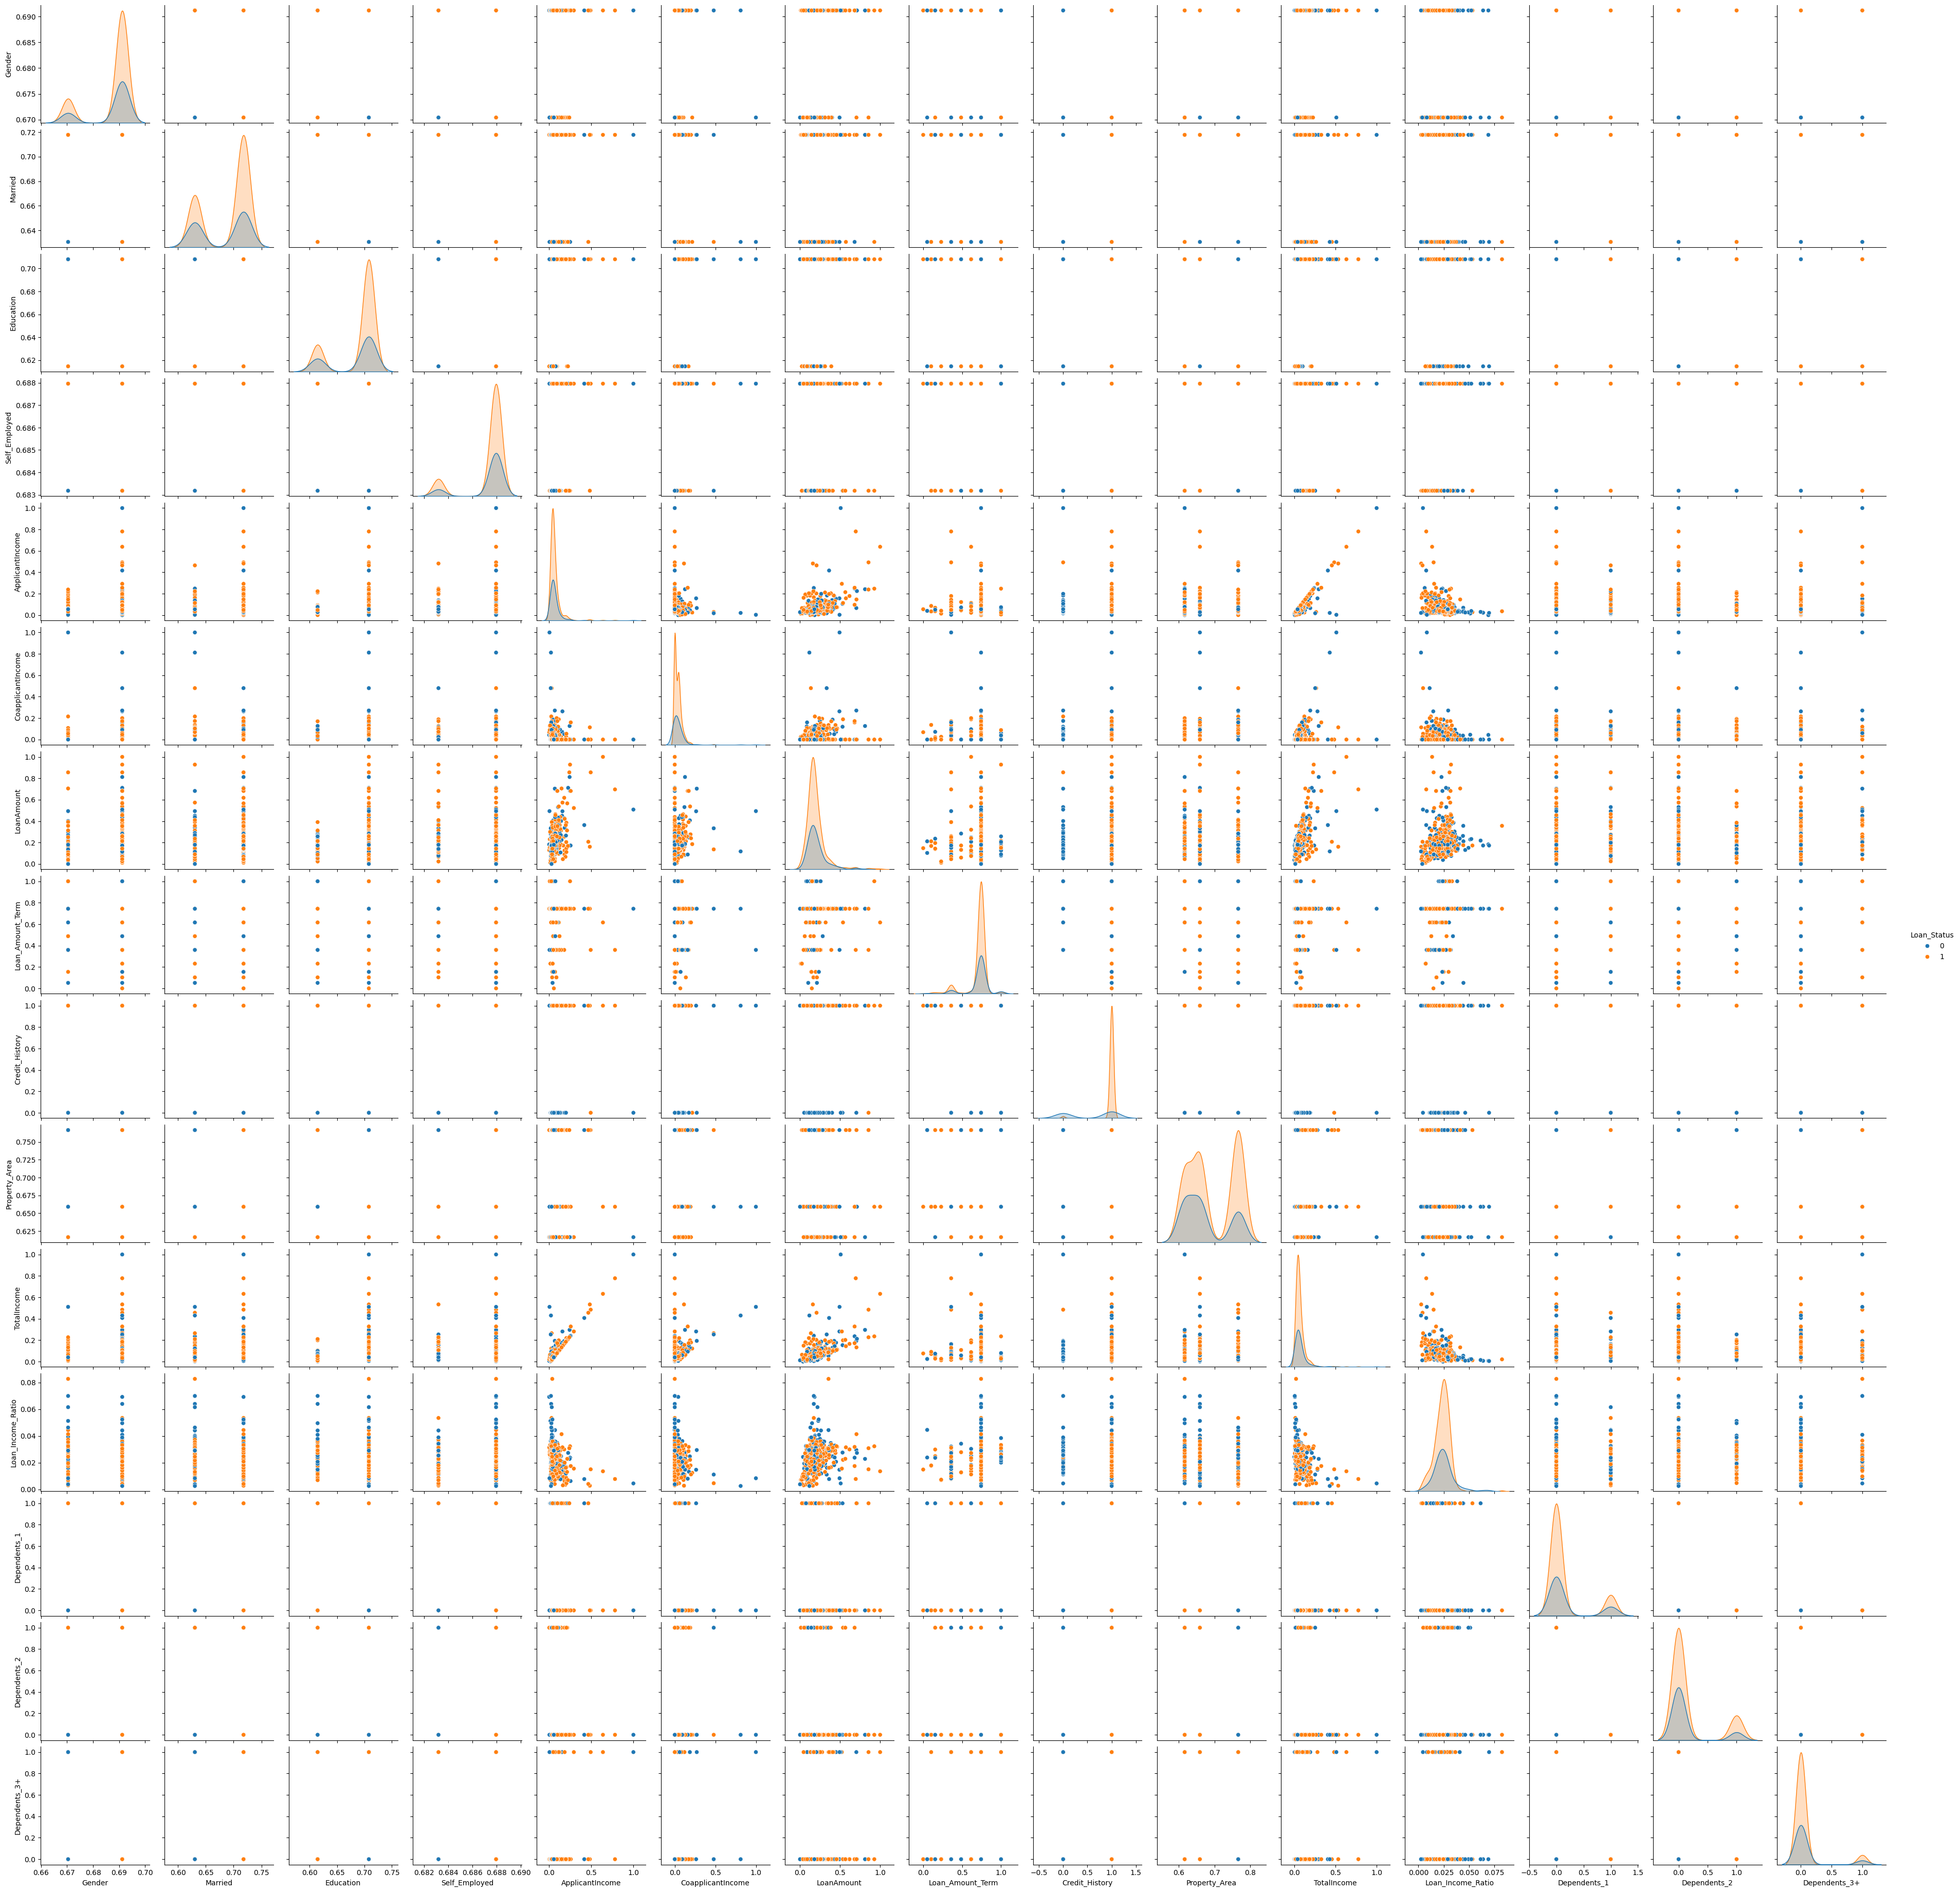

In [567]:
sns.pairplot(train, hue="Loan_Status")
plt.show()

In my experience:
When I upsample then split into train test, there is a chance of getting overfit because some of the test values are already seen.

But in this we already have the seperate test data we can upsample here.

In [568]:
# Separate majority and minority classes
df_majority = train[train["Loan_Status"] == 1]
df_minority = train[train["Loan_Status"] == 0]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Sample with replacement
                                 n_samples=len(df_majority),  # Match majority class count
                                 random_state=42)  # Ensure reproducibility

# Combine majority class with upsampled minority class
train = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
train = train.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution after upsampling
print(train["Loan_Status"].value_counts())


# Check class distribution after downsampling
print(train["Loan_Status"].value_counts())


Loan_Status
0    422
1    422
Name: count, dtype: int64
Loan_Status
0    422
1    422
Name: count, dtype: int64


In [569]:
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Income_Ratio,Loan_Status,Dependents_1,Dependents_2,Dependents_3+
0,0.691196,0.717824,0.708116,0.683178,0.017934,0.479996,0.332851,0.743590,1.0,0.659113,0.253375,0.011064,0,0.0,1.0,0.0
1,0.691196,0.717824,0.614651,0.687964,0.040186,0.039360,0.147612,0.358974,1.0,0.659113,0.045212,0.022024,1,1.0,0.0,0.0
2,0.691196,0.717824,0.708116,0.683178,0.031861,0.000000,0.140376,0.743590,0.0,0.766540,0.016139,0.038871,0,0.0,1.0,0.0
3,0.670397,0.630443,0.614651,0.683178,0.045974,0.000000,0.076700,0.743590,1.0,0.766540,0.030481,0.016029,0,1.0,0.0,0.0
4,0.691196,0.717824,0.708116,0.687964,0.019901,0.084983,0.176556,0.743590,1.0,0.766540,0.048493,0.024712,1,0.0,0.0,0.0


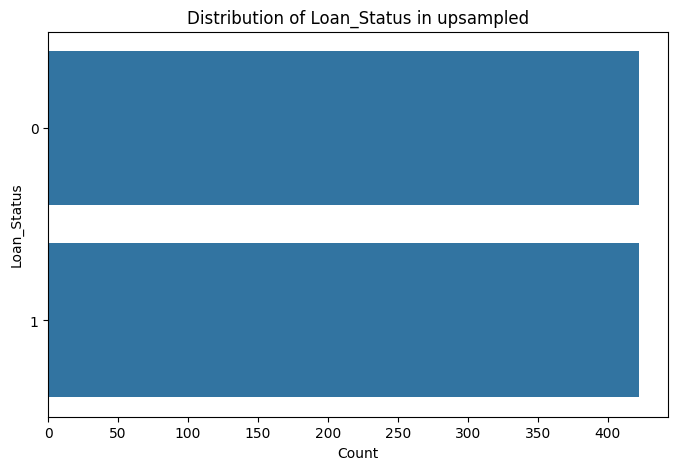

In [570]:
plt.figure(figsize=(8, 5))
sns.countplot(y=train["Loan_Status"], order=train["Loan_Status"].value_counts().index)
plt.title(f"Distribution of Loan_Status in upsampled")
plt.xlabel("Count")
plt.ylabel("Loan_Status")
plt.show()

In [571]:
# Assume df is your dataset
X = train.drop(columns=["Loan_Status"])  # Features
y = train["Loan_Status"]  # Target variable

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split dataset (80% training, 20% testing)


# Display the shapes of the training and test sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((675, 15), (169, 15), (675,), (169,))

In [572]:
X_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Income_Ratio,Dependents_1,Dependents_2,Dependents_3+
468,0.691196,0.717824,0.614651,0.683178,0.068683,0.000000,0.175109,0.743590,1.0,0.616503,0.053558,0.022791,0.0,0.0,1.0
786,0.691196,0.717824,0.708116,0.687964,0.030303,0.083999,0.153401,0.743590,1.0,0.659113,0.058548,0.018849,0.0,0.0,0.0
538,0.691196,0.717824,0.708116,0.683178,0.027767,0.000000,0.172214,0.743590,1.0,0.766540,0.011979,0.053422,1.0,0.0,0.0
266,0.691196,0.717824,0.614651,0.687964,0.072764,0.000000,0.218524,0.743590,1.0,0.659113,0.057706,0.026516,0.0,0.0,0.0
352,0.691196,0.717824,0.708116,0.683178,0.113457,0.188950,0.536903,0.615385,1.0,0.616503,0.198019,0.022097,0.0,1.0,0.0


In [573]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [574]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

In [575]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1, restore_best_weights=True)

In [576]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [577]:
# Define Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Reduce LR when validation loss stops improving
    factor=0.5,          # Reduce LR by a factor of 0.5
    patience=3,          # Wait for 3 epochs before reducing LR
    min_lr=0.00001       # Minimum LR to prevent over-reduction
)

In [578]:
X_train.shape[1]

15

In [579]:
from tensorflow.keras import backend as K
K.clear_session()

In [580]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    tf.keras.layers.Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    tf.keras.layers.Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    tf.keras.layers.Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Reduce LR for better convergence
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [581]:
# Train the Model with LR Scheduler
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[mc, early_stopping, lr_scheduler],  # Add lr_scheduler here
    verbose=1
)

Epoch 1/50
18/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5832 - loss: 0.8034

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5899 - loss: 0.7958 - val_accuracy: 0.4793 - val_loss: 0.7007 - learning_rate: 5.0000e-04
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6690 - loss: 0.6112 - val_accuracy: 0.4793 - val_loss: 0.7071 - learning_rate: 5.0000e-04
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6542 - loss: 0.6585 - val_accuracy: 0.4793 - val_loss: 0.7036 - learning_rate: 5.0000e-04
Epoch 4/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6563 - loss: 0.6755  

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6599 - loss: 0.6656 - val_accuracy: 0.4793 - val_loss: 0.6992 - learning_rate: 5.0000e-04
Epoch 5/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6814 - loss: 0.6040 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6849 - loss: 0.5945 - val_accuracy: 0.4793 - val_loss: 0.6918 - learning_rate: 5.0000e-04
Epoch 6/50
12/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6875 - loss: 0.5983 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6778 - loss: 0.6069 - val_accuracy: 0.5799 - val_loss: 0.6841 - learning_rate: 5.0000e-04
Epoch 7/50
13/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6773 - loss: 0.6239 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6762 - loss: 0.6207 - val_accuracy: 0.5917 - val_loss: 0.6786 - learning_rate: 5.0000e-04
Epoch 8/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7430 - loss: 0.5479 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7296 - loss: 0.5617 - val_accuracy: 0.6213 - val_loss: 0.6725 - learning_rate: 5.0000e-04
Epoch 9/50
13/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7402 - loss: 0.5551 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7223 - loss: 0.5652 - val_accuracy: 0.6272 - val_loss: 0.6631 - learning_rate: 5.0000e-04
Epoch 10/50
14/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7269 - loss: 0.5501 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7239 - loss: 0.5577 - val_accuracy: 0.6450 - val_loss: 0.6569 - learning_rate: 5.0000e-04
Epoch 11/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6445 - loss: 0.6703 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6561 - loss: 0.6500 - val_accuracy: 0.6627 - val_loss: 0.6518 - learning_rate: 5.0000e-04
Epoch 12/50
14/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7253 - loss: 0.5485 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7181 - loss: 0.5604 - val_accuracy: 0.6982 - val_loss: 0.6374 - learning_rate: 5.0000e-04
Epoch 13/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7013 - loss: 0.5584 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7051 - loss: 0.5574 - val_accuracy: 0.6982 - val_loss: 0.6236 - learning_rate: 5.0000e-04
Epoch 14/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6873 - loss: 0.5702 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6922 - loss: 0.5785 - val_accuracy: 0.6982 - val_loss: 0.6108 - learning_rate: 5.0000e-04
Epoch 15/50
14/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7271 - loss: 0.5406 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7220 - loss: 0.5426 - val_accuracy: 0.7101 - val_loss: 0.6061 - learning_rate: 5.0000e-04
Epoch 16/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7218 - loss: 0.5422 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7210 - loss: 0.5494 - val_accuracy: 0.7101 - val_loss: 0.6037 - learning_rate: 5.0000e-04
Epoch 17/50
14/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6730 - loss: 0.5659 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6798 - loss: 0.5667 - val_accuracy: 0.7101 - val_loss: 0.6023 - learning_rate: 5.0000e-04
Epoch 18/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7154 - loss: 0.5618 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7066 - loss: 0.5676 - val_accuracy: 0.7101 - val_loss: 0.5967 - learning_rate: 5.0000e-04
Epoch 19/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6346 - loss: 0.6757 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6517 - loss: 0.6510 - val_accuracy: 0.7041 - val_loss: 0.5845 - learning_rate: 5.0000e-04
Epoch 20/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7259 - loss: 0.5831 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7272 - loss: 0.5749 - val_accuracy: 0.7041 - val_loss: 0.5819 - learning_rate: 5.0000e-04
Epoch 21/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7244 - loss: 0.5925 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7235 - loss: 0.5849 - val_accuracy: 0.7160 - val_loss: 0.5757 - learning_rate: 5.0000e-04
Epoch 22/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7362 - loss: 0.5385 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7215 - loss: 0.5525 - val_accuracy: 0.7101 - val_loss: 0.5683 - learning_rate: 5.0000e-04
Epoch 23/50
12/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6950 - loss: 0.5666 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6998 - loss: 0.5682 - val_accuracy: 0.7160 - val_loss: 0.5663 - learning_rate: 5.0000e-04
Epoch 24/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7181 - loss: 0.5293 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7157 - loss: 0.5370 - val_accuracy: 0.7337 - val_loss: 0.5628 - learning_rate: 5.0000e-04
Epoch 25/50
14/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6698 - loss: 0.6407 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6803 - loss: 0.6174 - val_accuracy: 0.7337 - val_loss: 0.5579 - learning_rate: 5.0000e-04
Epoch 26/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7043 - loss: 0.5843 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7123 - loss: 0.5750 - val_accuracy: 0.7396 - val_loss: 0.5484 - learning_rate: 5.0000e-04
Epoch 27/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6953 - loss: 0.5701 - val_accuracy: 0.7278 - val_loss: 0.5529 - learning_rate: 5.0000e-04
Epoch 28/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6956 - loss: 0.5649 - val_accuracy: 0.7396 - val_loss: 0.5555 - learning_rate: 5.0000e-04
Epoch 29/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6779 - loss: 0.5798 - val_accuracy: 0.7337 - val_loss: 0.5500 - learning_rate: 5.0000e-04
Epoch 30/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7183 - loss: 0.5503 - val_accuracy: 0.7337 - val_loss: 0.5518 - learning_rate: 2.5000e-04
Epoch 31/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7144 - loss: 0.5420 - val_accuracy: 0.7337 - val_loss: 0.5515 - learning_rate: 2.5000e-04
Epoch 31: early stopping
Restoring model weights from the end of the best epoch: 

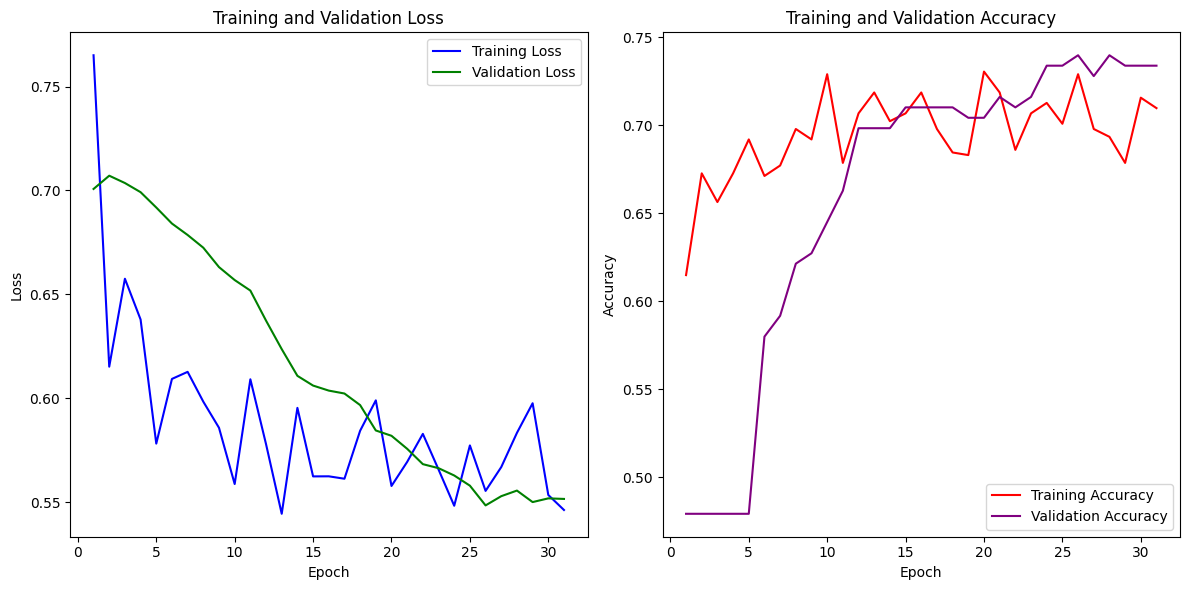

In [582]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plotting both loss and accuracy in one figure
plt.figure(figsize=(12, 6))

# First subplot for loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Second subplot for accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training Accuracy', color='red')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='purple')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [583]:
from tensorflow.keras.models import load_model

model = load_model("best_model.h5")


In [584]:
# Get model predictions
predictions = model.predict(test, verbose=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [585]:
# Load test dataset
test_data = pd.read_csv("/content/drive/MyDrive/Loan_test.csv")

# Store Loan_ID separately before dropping
loan_ids = test_data["Loan_ID"].values


In [586]:
# Convert predictions to 'Y' and 'N'
predicted_classes = np.where(predictions > 0.5, "Y", "N")

# Ensure Loan_IDs and predictions have the same length
assert len(loan_ids) == len(predicted_classes), "Mismatch in Loan_ID and predictions length!"

# Create a DataFrame for submission
submission = pd.DataFrame({
    "Loan_ID": loan_ids,  # Adding back Loan_ID
    "Loan_Status": predicted_classes.flatten()
})

# Save to CSV
submission.to_csv("/content/drive/MyDrive/submission.csv", index=False)

print("Predictions saved as submission.csv")


Predictions saved as submission.csv


In [587]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))

Credit_History       0.219738
Loan_Income_Ratio    0.138282
ApplicantIncome      0.128444
TotalIncome          0.123196
LoanAmount           0.120260
CoapplicantIncome    0.080097
Property_Area        0.046762
Married              0.025441
Education            0.024678
Loan_Amount_Term     0.020780
Dependents_1         0.018125
Gender               0.015012
Self_Employed        0.014457
Dependents_3+        0.012435
Dependents_2         0.012293
dtype: float64


In [588]:
model.save("best_model.h5")

In [589]:
import joblib

# Save encoders
joblib.dump(encoder_mestimate, "mestimate_encoder.pkl")
joblib.dump(scaler, "minmax_scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(encoder_onehot, "onehot_encoder.pkl")

['onehot_encoder.pkl']

In [590]:
from google.colab import files
files.download("best_model.h5")
files.download("mestimate_encoder.pkl")
files.download("minmax_scaler.pkl")
files.download("label_encoder.pkl")
files.download("onehot_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>